# KNN from scratch

## Task - Predict the diamond price.💎

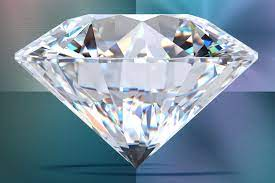

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.shape

(53940, 10)

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.duplicated().sum()

146

<AxesSubplot:>

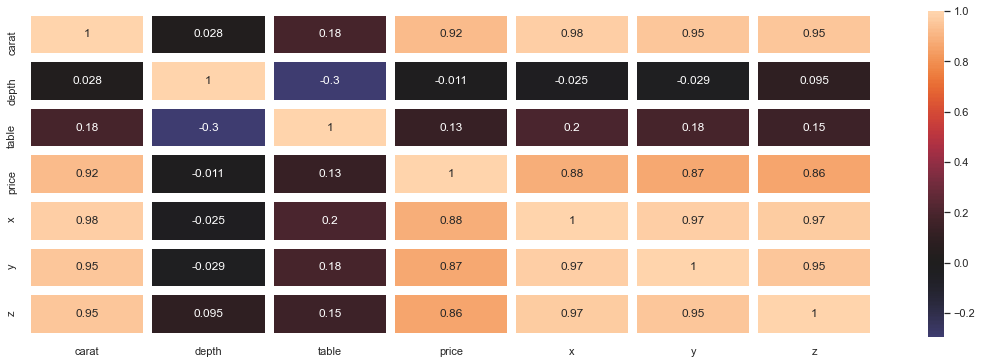

In [10]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0,ax=ax)

<AxesSubplot:xlabel='clarity'>

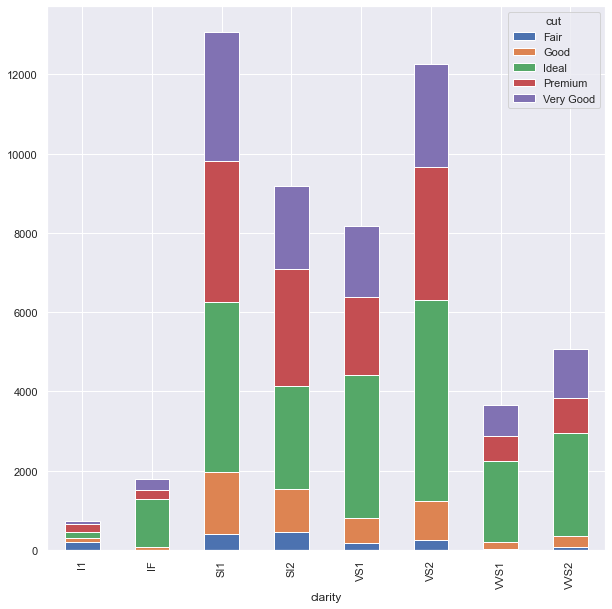

In [11]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True) #clarity cut table

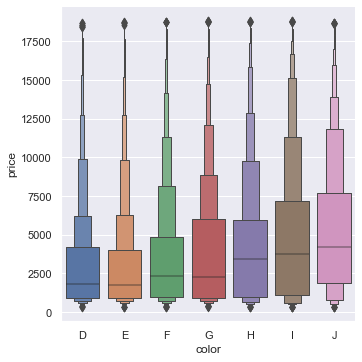

In [12]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = df.sort_values('color'))

C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

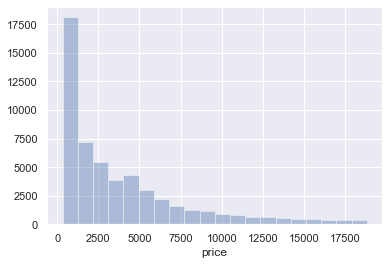

In [13]:
sns.distplot(df.price, kde = False , bins= 20)

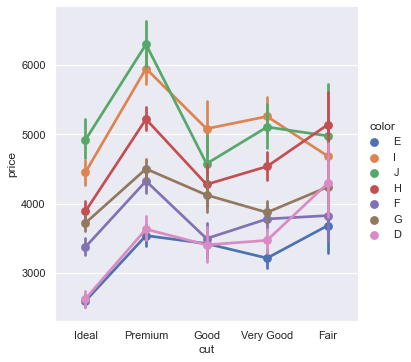

In [14]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df)

<AxesSubplot:xlabel='table', ylabel='depth'>

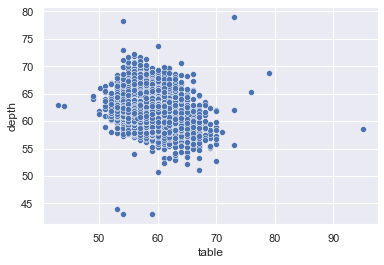

In [15]:
sns.scatterplot(x="table",y="depth",data=df)

<AxesSubplot:xlabel='carat', ylabel='color'>

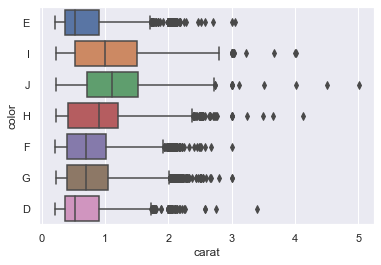

In [16]:
sns.boxplot (x="carat",y="color",data=df)

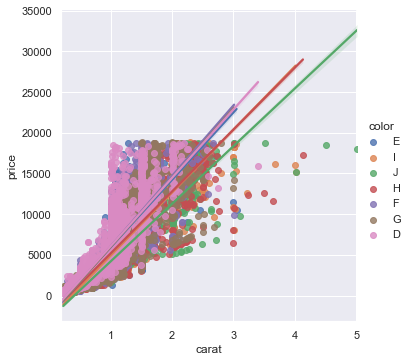

In [17]:
sns.lmplot(x="carat",y="price",hue = 'color',  data=df)

Text(0.5, 1.0, 'Distribution of Diamond Volume')

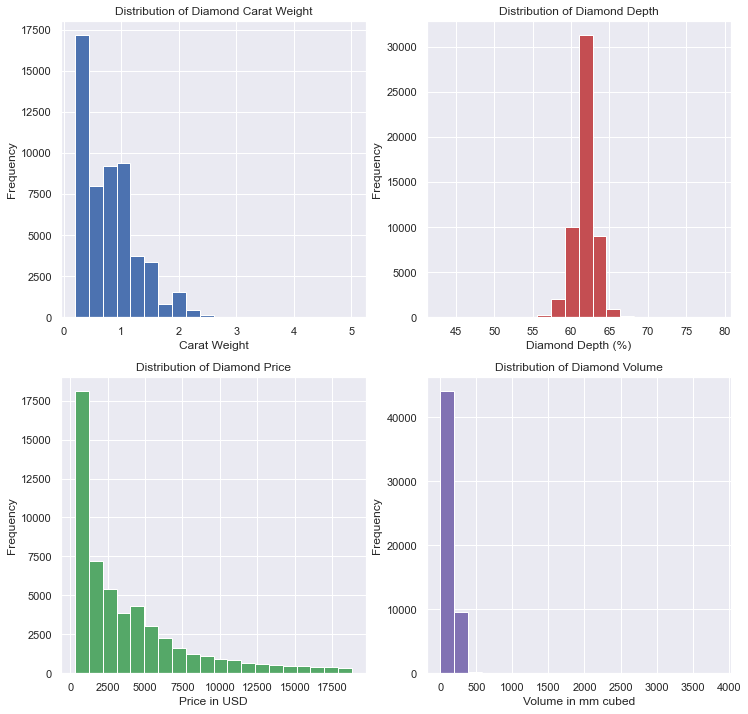

In [18]:
df['volume'] = df['x']*df['y']*df['z']
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(df['price'],bins=20,color='g')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(df['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

<AxesSubplot:xlabel='clarity', ylabel='price'>

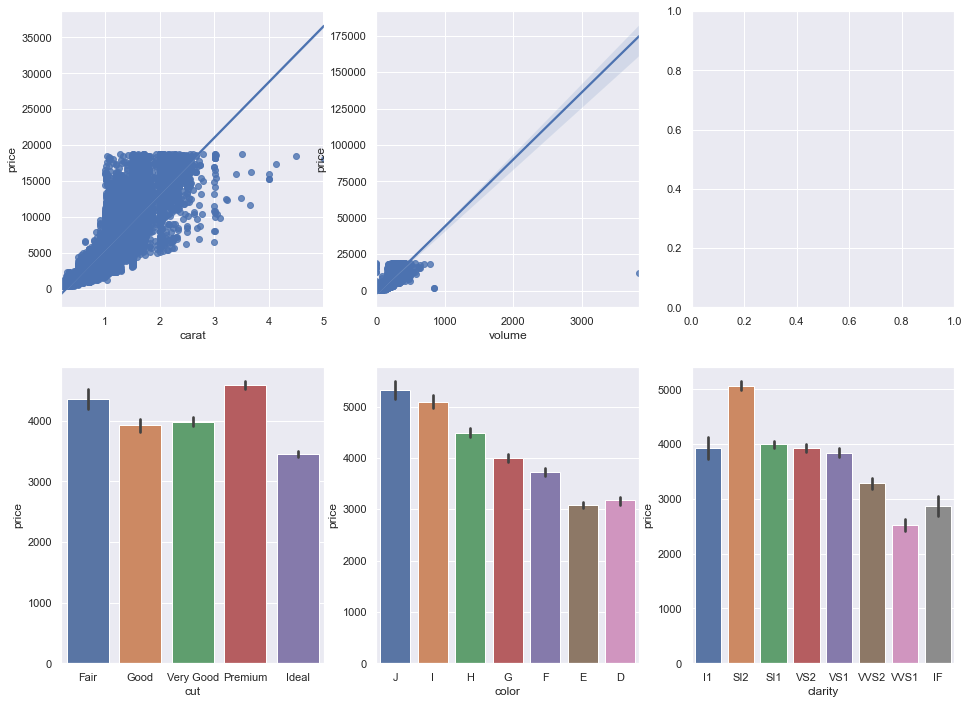

In [19]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.regplot(x = 'carat', y = 'price', data=df, ax = saxis[0,0])
sns.regplot(x = 'volume', y = 'price', data=df, ax = saxis[0,1])

# Order the plots from worst to best
sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=df, ax = saxis[1,0])
sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=df, ax = saxis[1,1])
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=df, ax = saxis[1,2])

<AxesSubplot:>

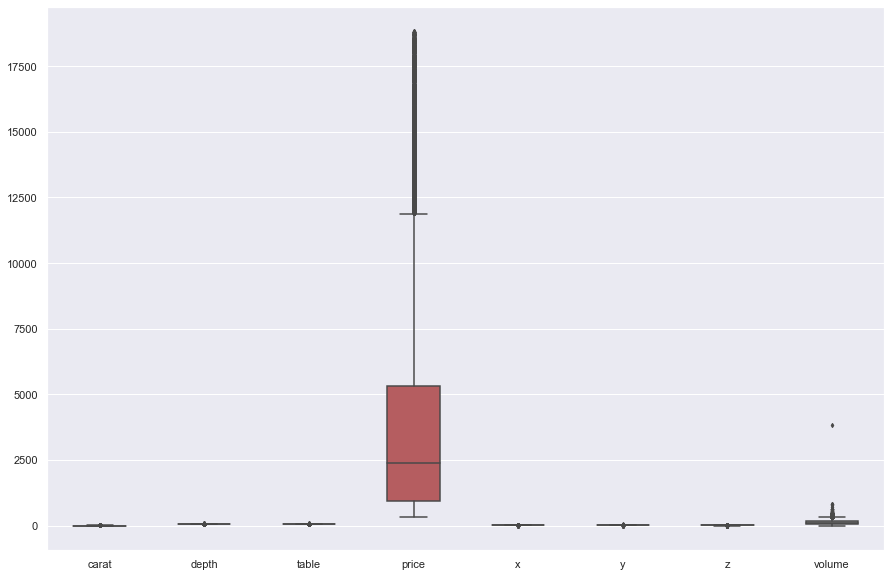

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [21]:
q = df['price'].quantile(0.95)
# we are removing the top 5% data from the price column
data_cleaned = df[df['price']<q]
q = data_cleaned['volume'].quantile(0.99)
# we are removing the top 1% data from the Volume column
data_cleaned  = data_cleaned[data_cleaned['volume']<q]

In [22]:
data_cleaned.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


<AxesSubplot:>

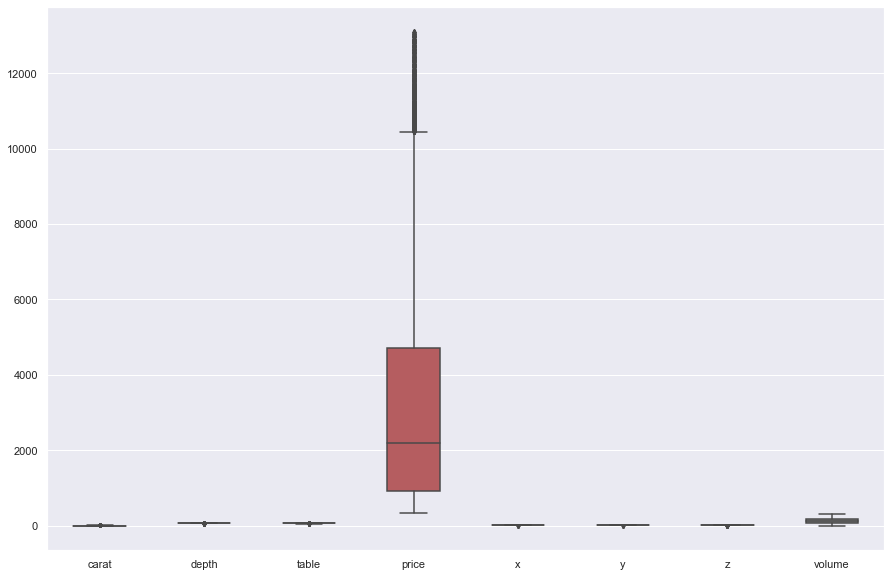

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [57]:
# Assigning the featurs as X and trarget as y
X = data_cleaned.drop(['price','cut','color','clarity'], axis=1)
y= data_cleaned[["price"]]

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,360.719036,carat
1,5.361847,depth
2,1.296534,table
3,303.181660,x
4,271.918984,y
5,179.494171,z
6,422.801640,volume


In [64]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [65]:
X

,carat,depth,table,x,y,z,volume
0,0.23,61.5,55.0,3.95,3.98,2.43,38.202030
1,0.21,59.8,61.0,3.89,3.84,2.31,34.505856
2,0.23,56.9,65.0,4.05,4.07,2.31,38.076885
3,0.29,62.4,58.0,4.20,4.23,2.63,46.724580
4,0.31,63.3,58.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,115.920000
53936,0.72,63.1,55.0,5.69,5.75,3.61,118.110175
53937,0.70,62.8,60.0,5.66,5.68,3.56,114.449728
53938,0.86,61.0,58.0,6.15,6.12,3.74,140.766120


In [66]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [67]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25)

In [68]:
from sklearn.neighbors import KNeighborsRegressor
reg_all = KNeighborsRegressor(n_neighbors = 8, p = 2)
reg_all.fit(x_train,y_train)
y_pred=reg_all.predict(x_test)

In [70]:
y_pred

array([[ 908.5  ],
       [8214.5  ],
       [1950.   ],
       ...,
       [1578.5  ],
       [5388.625],
       [6264.875]])

In [80]:
# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.789396     0.996727
1    2    0.825824     0.946752
2    3    0.836823     0.923406
3    4    0.844647     0.909495
4    5    0.849566     0.901734
5    6    0.852559     0.896477
6    7    0.854834     0.892239
7    8    0.856372     0.889784
8    9    0.857256     0.887441
9   10    0.857975     0.885285
10  11    0.858865     0.883872
11  12    0.859466     0.882683
12  13    0.859991     0.881801
13  14    0.860643     0.880757
14  15    0.861098     0.880122
15  16    0.861185     0.879349


# Conclusion
- We can see values of diamonds now.
- We've reached relationship between columns.
- Knew effect of price,carat,table,depth
- Showed some graphical things
- Predicted the price